In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import keras

In [17]:


def get_categoria(etichetta):
    if etichetta.startswith("NDR"):
        return "NDR"
    elif etichetta.startswith("ND"):
        return "ND"
    elif etichetta.startswith("NR"):
        return "NR"
    else:
        return "NN"

def plot_metrica_subplots(metrica, etichette, validation_years, nome_metrica="Metrica"):
    num_indici = metrica.shape[0]
    num_anni = metrica.shape[1]

    assert num_anni == len(validation_years), "Le colonne della metrica devono corrispondere agli anni"

    # Definiamo colori e marker per categoria
    stili = {
        "NN": {"color": "blue", "marker": "o"},
        "NDR":  {"color": "green", "marker": "s"},
        "ND":   {"color": "blue", "marker": "D"},
        "NR":   {"color": "purple", "marker": "^"},
    }

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharey=True)
    axs2 = axs.flatten()

    for i in range(num_anni):
        ax = axs2[i]

        # Raggruppiamo le etichette per categoria
        categorie = {}
        for j, et in enumerate(etichette):
            cat = get_categoria(et)
            if cat not in categorie:
                categorie[cat] = {"x": [], "y": []}
            categorie[cat]["x"].append(j)
            categorie[cat]["y"].append(metrica[j, i])

        # Disegniamo ogni categoria come linea
        for cat, data in categorie.items():
            stile = stili[cat]
            ax.plot(
                data["x"], data["y"],
                marker=stile["marker"],
                color=stile["color"],
                linestyle="-",
                linewidth=2.5,
                markersize=10,
                label=cat
            )

            # Valore numerico sopra a ogni punto
            #for x, y in zip(data["x"], data["y"]):
             #   ax.text(x, y + np.abs(y * 0.01), f"{y:.3f}", ha='center', va='bottom', fontsize=9)

        ax.set_title(f"{nome_metrica} - Year {validation_years[i]}", fontsize=18, fontweight='bold')
        ax.set_xticks(np.arange(len(etichette)))

        ax.tick_params(axis='y', labelsize=14)

        # Etichette asse X colorate in base alla categoria
        tick_labels = ax.set_xticklabels(etichette, rotation=90, fontsize=14)
        for lbl, et in zip(tick_labels, etichette):
            cat = get_categoria(et)
            lbl.set_color(stili[cat]["color"])

        ax.grid(True)

        

    # Rimuove eventuali assi extra se ci sono meno di 4 grafici
    for j in range(num_anni, len(axs2)):
        fig.delaxes(axs2[j])

    # Legenda con categorie
    #handles, labels = axs2[0].get_legend_handles_labels()
    #fig.legend(handles, stili.keys(), loc="upper center", ncol=4)

    
    plt.subplots_adjust(hspace=0.5)
    plt.savefig(f"{nome_metrica}.png", dpi=300)
    plt.show()



In [ ]:
#Unione indici di prestazione CON NORMALIZZAZIONE DEI DATI
#INDEX_PEFORMANCE_DIR = "01-ESPORTAZIONI/02-VALIDAZIONE/00-INDICI_PRESTAZIONI/00-NORM_INDIPENDENTE/01-UFFICIALE"
INDEX_PEFORMANCE_DIR = "D:\Magistrale\04-PRESTAZIONI"



ETICHETTE = os.listdir(INDEX_PEFORMANCE_DIR)
ETICHETTE= sorted(ETICHETTE, key=lambda f: int(f.split('_')[-1].replace('Trials.xlsx','')))

VALIDATION_YEAR = ["2020_2022", "2020", "2021", "2022"]

#ogni riga corrisponde agli indici di prestazione di un modello
MAE = np.zeros((len(ETICHETTE), 4))
NMAE = np.zeros(MAE.shape)
ME = np.zeros(MAE.shape)
NME = np.zeros(MAE.shape)
CORR = np.zeros(MAE.shape)
M_TRUE = np.zeros(MAE.shape)
M_PRED = np.zeros(MAE.shape)

for idx, filename in enumerate(ETICHETTE):
    index_performance = pd.read_excel(os.path.join(INDEX_PEFORMANCE_DIR, filename), header=None)

    MAE[idx, :] = index_performance.iloc[1, 1:]
    NMAE[idx, :] = index_performance.iloc[2, 1:]
    ME[idx, :] = index_performance.iloc[3, 1:]
    NME[idx, :] = index_performance.iloc[4, 1:]
    CORR[idx, :] = index_performance.iloc[5, 1:]
    M_TRUE[idx, :] = index_performance.iloc[6, 1:]
    M_PRED[idx, :] = index_performance.iloc[7, 1:]

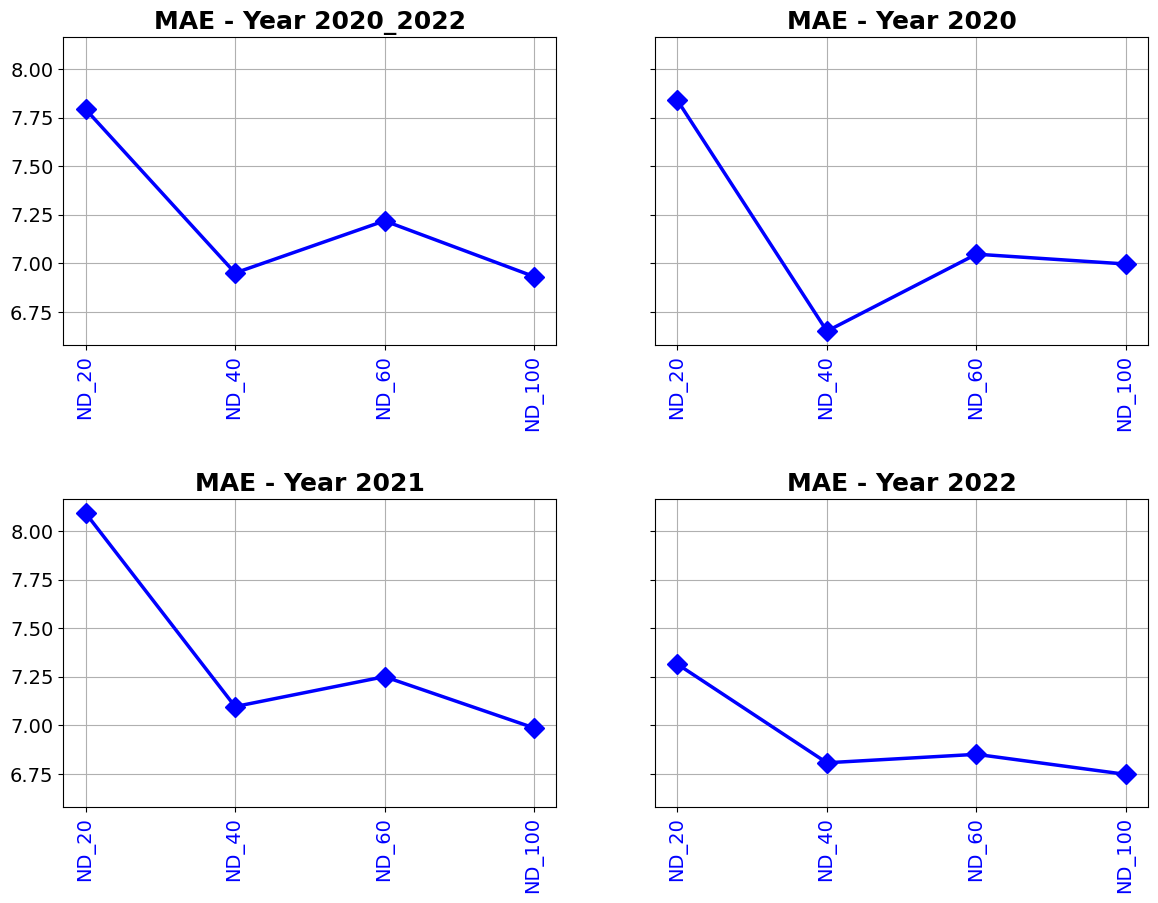

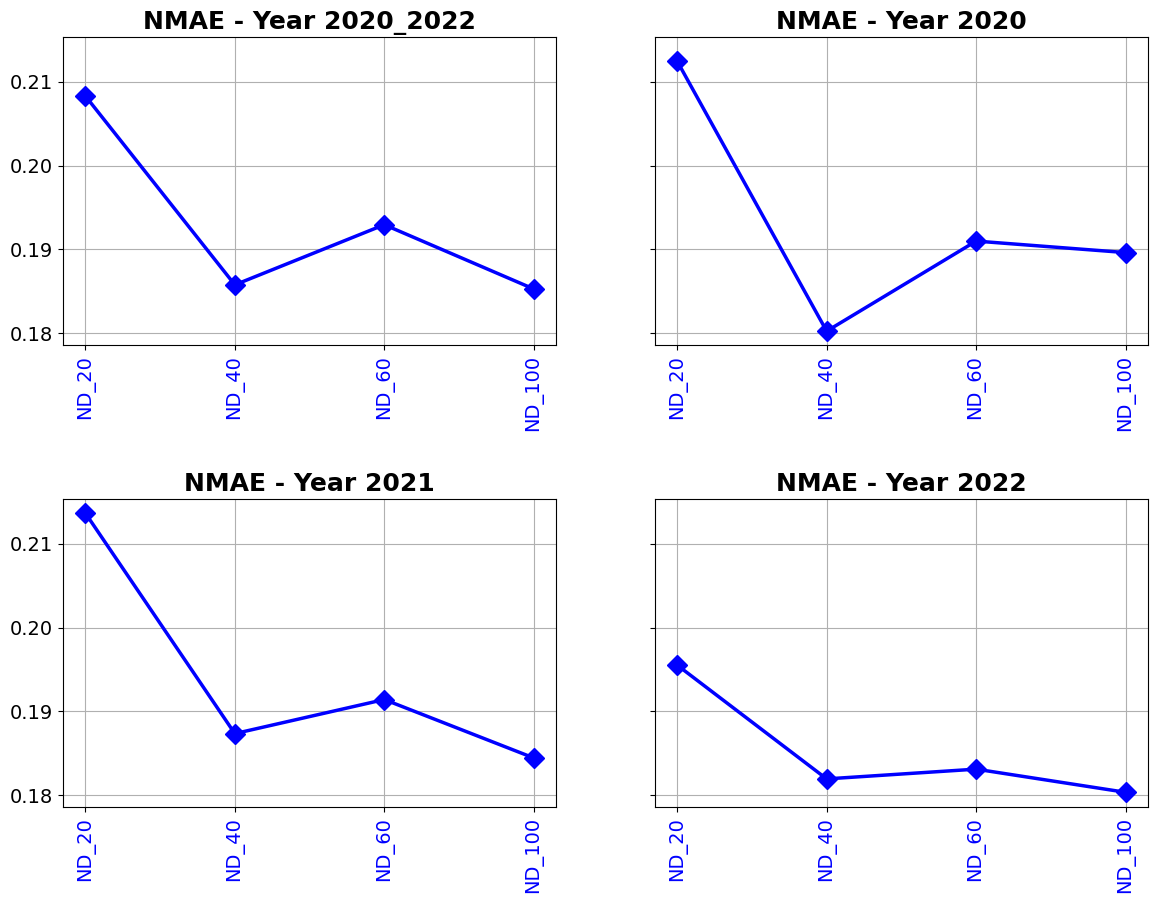

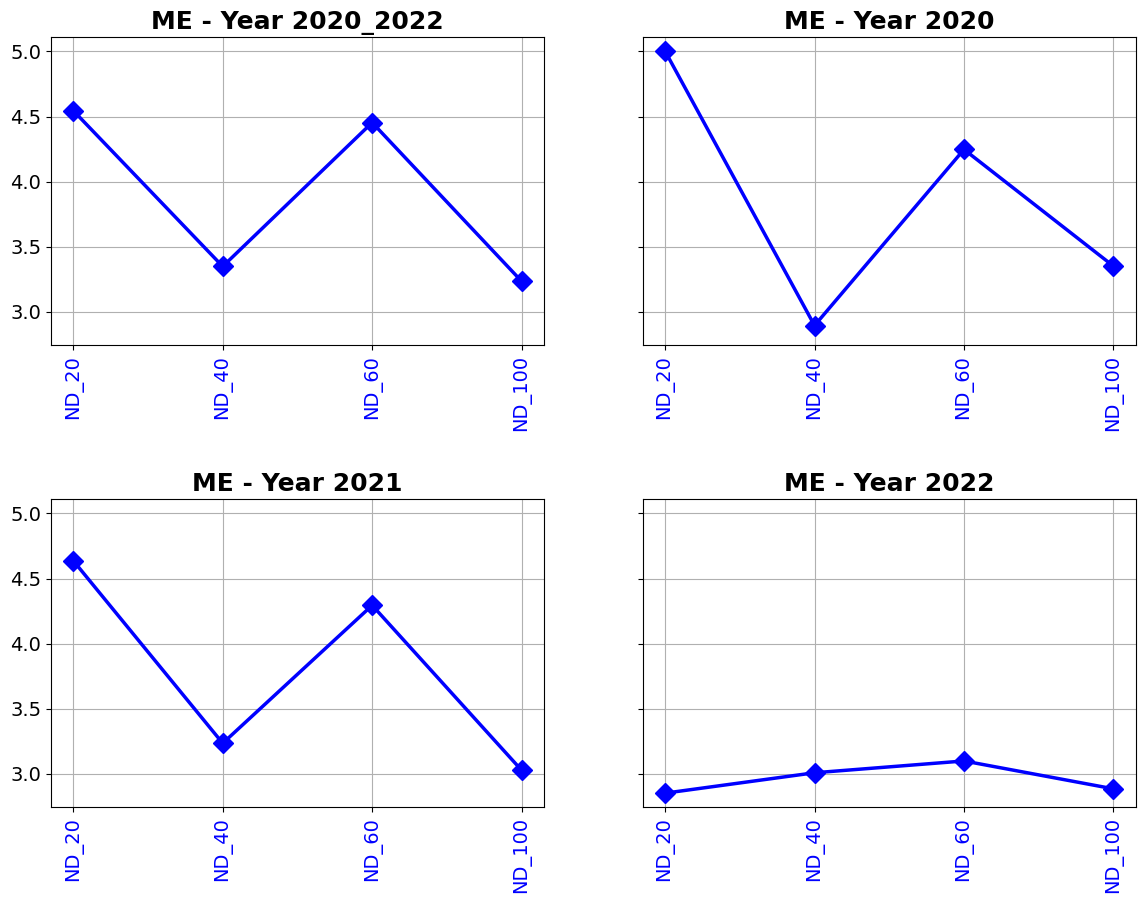

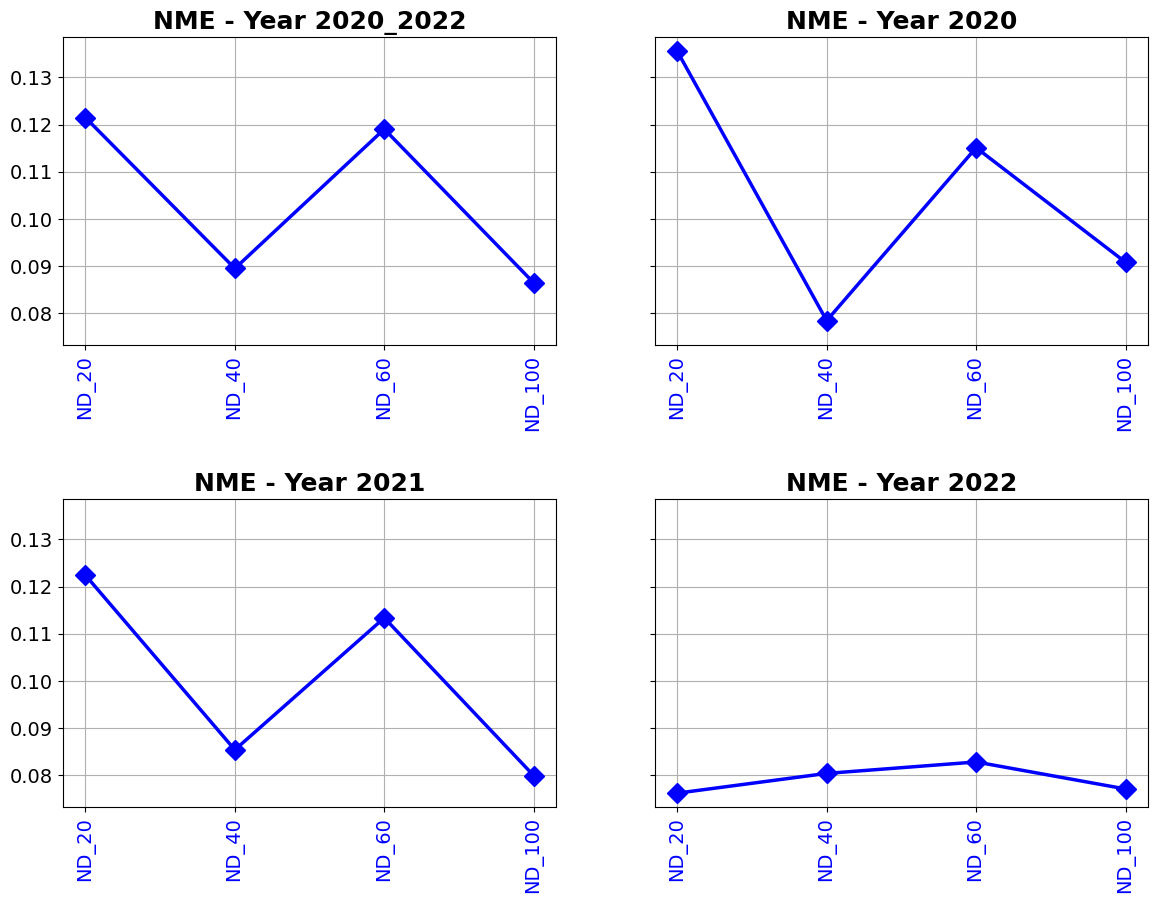

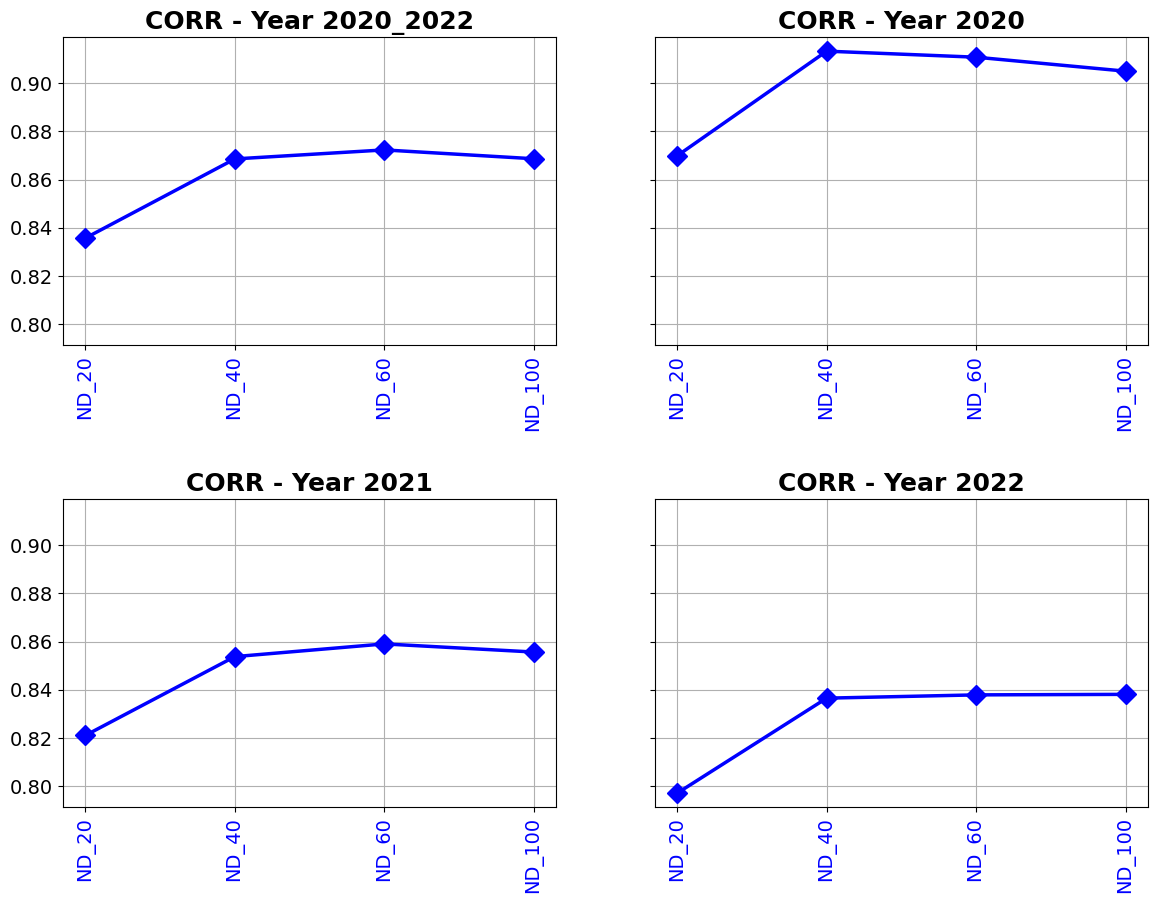

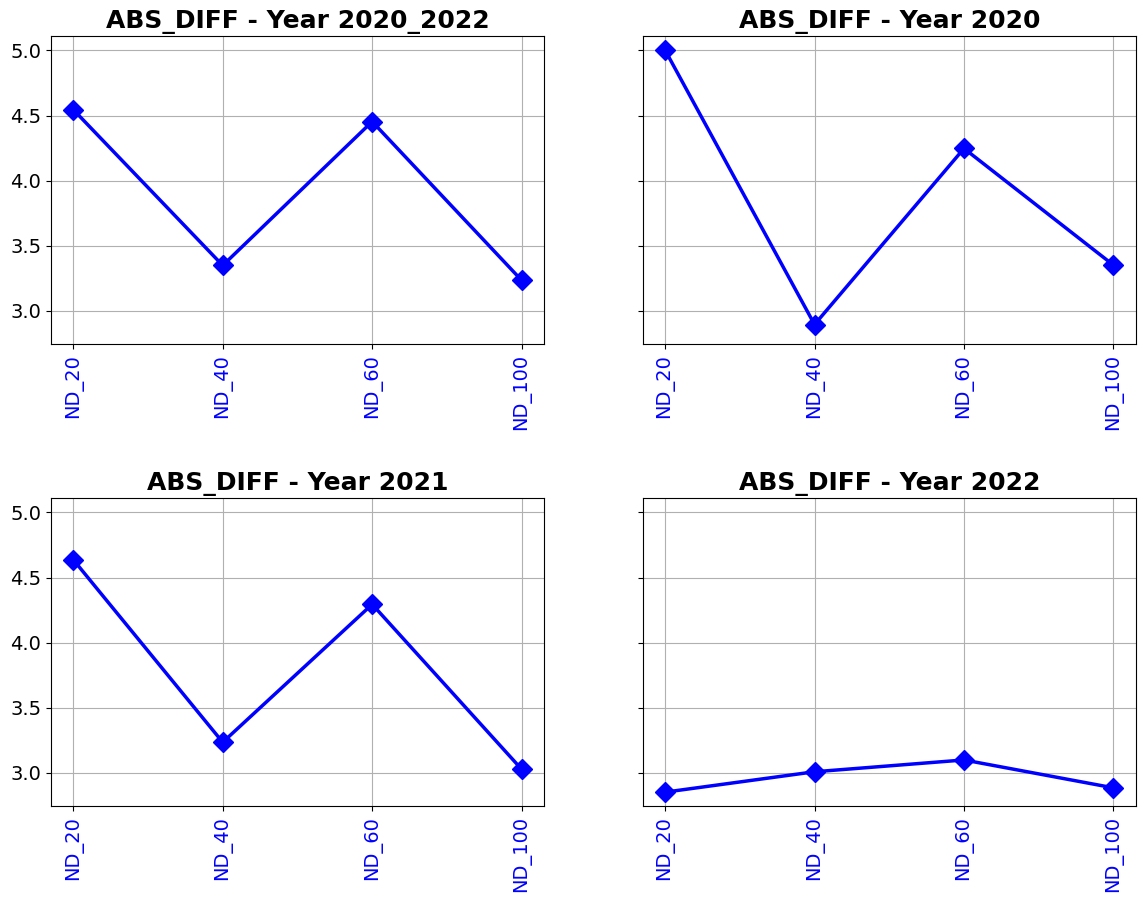

In [18]:
ETICHETTE = [nome.removeprefix("IndiciPrestazione_").removesuffix("Trials.xlsx") for nome in ETICHETTE]

plot_metrica_subplots(MAE, etichette=ETICHETTE, validation_years=VALIDATION_YEAR, nome_metrica="MAE")
plot_metrica_subplots(NMAE, etichette=ETICHETTE, validation_years=VALIDATION_YEAR, nome_metrica="NMAE")
plot_metrica_subplots(ME, etichette=ETICHETTE, validation_years=VALIDATION_YEAR, nome_metrica="ME")
plot_metrica_subplots(NME, etichette=ETICHETTE, validation_years=VALIDATION_YEAR, nome_metrica="NME")
plot_metrica_subplots(CORR, etichette=ETICHETTE, validation_years=VALIDATION_YEAR, nome_metrica="CORR")
diff = np.abs(M_TRUE-M_PRED)
plot_metrica_subplots(diff, etichette=ETICHETTE, validation_years=VALIDATION_YEAR, nome_metrica="ABS_DIFF")
